In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive

In [ ]:
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path ke data training dan testing
train_image_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Training'
val_image_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Validasi'
test_image_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Testing'



In [ ]:
# Image data generator tanpa augmentasi, hanya rescale
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Load data training dan testing tanpa augmentasi
train_data = train_datagen.flow_from_directory(
    train_image_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_image_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_image_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

Found 5460 images belonging to 3 classes.
Found 2340 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
# Load model ResNet50 pre-trained dari ImageNet tanpa fully connected layers (include_top=False)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Membekukan lapisan convolutional dari model pre-trained
base_model.trainable = False


In [ ]:
# Tambahkan lapisan klasifikasi di atasnya
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

In [ ]:
# Membuat model akhir
ResNet50_transfer_model = Model(inputs=base_model.input, outputs=output)


In [ ]:
# Kompilasi model
ResNet50_transfer_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


In [ ]:
# Melatih model dengan callback Early Stopping
history = ResNet50_transfer_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=100,                # Meningkatkan jumlah epoch maksimum
    validation_data=val_data,
    validation_steps=val_data.samples // test_data.batch_size,

)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1565s 29s/step - accuracy: 0.3296 - loss: 1.2791 - val_accuracy: 0.3370 - val_loss: 1.0980
Epoch 2/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.4100 - loss: 1.1113

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 411ms/step - accuracy: 0.4100 - loss: 1.1113 - val_accuracy: 0.3343 - val_loss: 1.0973
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3499 - loss: 1.1535 - val_accuracy: 0.3404 - val_loss: 1.0977
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.3700 - loss: 1.1199 - val_accuracy: 0.3374 - val_loss: 1.0980
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.3405 - loss: 1.1237 - val_accuracy: 0.3457 - val_loss: 1.0957
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.3700 - loss: 1.0828 - val_accuracy: 0.3396 - val_loss: 1.0960
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3490 - loss: 1.1125 - val_accuracy: 0.3335 - val_loss: 1.0960
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.3600 - loss: 1.0984 - val_accuracy: 0.3343 - val_loss: 1.0960
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3566 - loss: 1.1036 - val_accuracy: 0.3722 - 

In [ ]:
ResNet50_transfer_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 30,671,755 (117.00 MB)

 Trainable params: 2,361,347 (9.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,722,696 (18.02 MB)

In [ ]:
model_save_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Model/ResNet50_transfer_model(100_epoch).h5'
ResNet50_transfer_model.save(model_save_path)
print(f"Model terakhir telah disimpan di: {model_save_path}")

Model terakhir telah disimpan di: /content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Model/ResNet50_transfer_model(100_epoch).h5


In [ ]:
# Simpan history ke file TXT di Google Drive
import json

save_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Model/ResNet50_TL_training_history_100epoch.txt'

with open(save_path, 'w') as f:
    json.dump(history.history, f, indent=4)

print(f"Training history saved to '{save_path}'")


Training history saved to '/content/drive/MyDrive/Data_Skripsi_Akhir/Coba_Segmentasi/Model/ResNet50_TF_training_history_100epoch.txt'


In [ ]:
# Evaluasi model pada data testing
test_loss, test_acc = ResNet50_transfer_model.evaluate(test_data)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 15s/step - accuracy: 0.5321 - loss: 0.7794
Test accuracy: 0.6466666460037231
Test loss: 0.6885599493980408


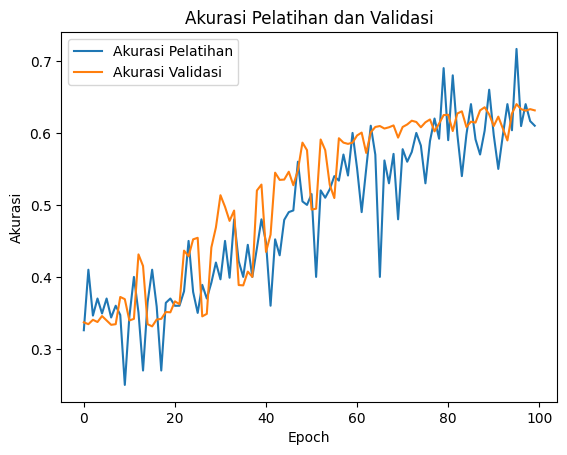

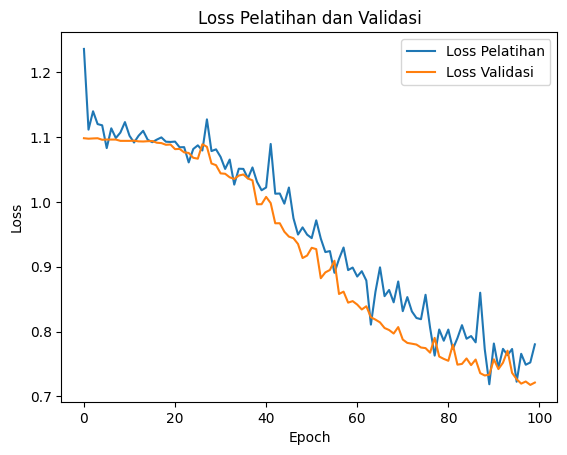

In [ ]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step


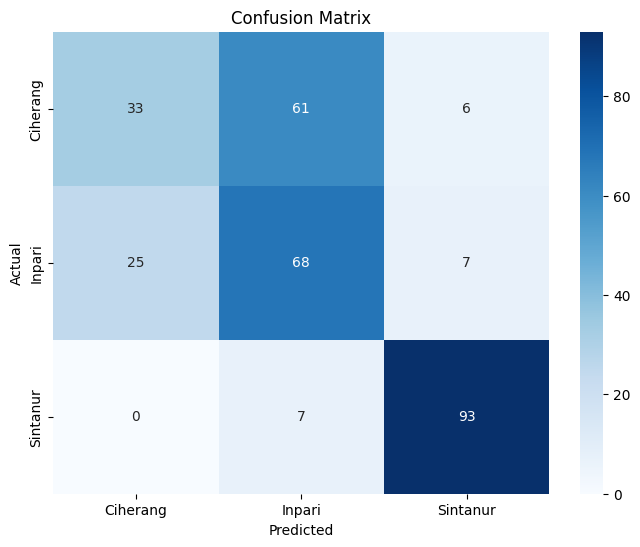

In [ ]:
# --- Tambahkan Confusion Matrix ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Prediksi data validasi
y_pred_probs = ResNet50_transfer_model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Ambil label sebenarnya
y_true = test_data.classes

# Nama kelas
class_labels = list(test_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Laporan klasifikasi (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

    Ciherang       0.57      0.33      0.42       100
      Inpari       0.50      0.68      0.58       100
    Sintanur       0.88      0.93      0.90       100

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.63       300
weighted avg       0.65      0.65      0.63       300

